# Time Series Analysis 2025: Assignment 1

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/ts2025-presentations-tedy_irina/blob/main/Assignment.ipynb)

The following code cell loads a time series `ts1` as a pandas Series object. The goal in this assignment is to find an ARIMA model that fits this time series well and use it to forecast future values.

1. Explore the time series visually by examining its time series plot, ACF, and PACF.
2. Select a couple of candidate ARIMA models based on your visual analysis.
3. Fit the candidate models to the data
4. Compute and plot the model forecast for five periods after the end of the series.

## Presentation

For the presentation of your results please include **only**:

- Plots
- Numeric results
- Tables of model parameters and summaries

Do **not** include:
- Text
- Custom functions
- if-then-else statements or similar control flow structures

In the presentation you should be able to explain your model selection process and justify your choices based on the data analysis **without** relying on text explanations in the notebook itself or additional notes (including on paper).

- You should also be able to explain the concept of correlation, what is measures (and what it does not measure).
- You should be able to explain the difference between ACF and PACF and how they can be used in model selection.
- You should be able to explain the meaning of stationarity in the context of time series analysis.
- You should be able to determine whether a time series is stationary or not given the model definition and/or plots of the time series. You should be able to derive the stationarity condition for AR models given the model definition.
- You should be familiar with the Ljung-Box test and be able to use it to assess model fit.
- You should be able to explain how the model constructs the forecasts and the standard errors of the forecasts and reconstruct these calculations for simple models (e.g., AR(1), MA(1), ARMA(1,1)) by hand.


## Submission of the Assignment

You can open the assignment notebook in Google Colab by clicking on the button at the top of this notebook. After editing the notebook in Colab, download it as an IPython notebook file (`.ipynb`) to your local computer. Then open your assignment repository by clicking on the link below:

[https://classroom.github.com/a/fsn1fbnY](https://classroom.github.com/a/fsn1fbnY)

In your assignment repository, click on the "Add file" button and upload your completed assignment notebook. Find the green "Commit changes" button and click it to submit your assignment.

Open the repository again by clicking on the link above and verify that your uploaded notebook is present in the repository.


In [2]:
import pandas as pd

ts1 = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/ts2025/a1/ts16.csv", header=None).squeeze()
ts1.head()


,0
0,1.501985
1,-3.156179
2,0.224322
3,-0.768440
4,0.604270


# 1. Exploring time series visually by examining its time series plot, ACF, and PACF.

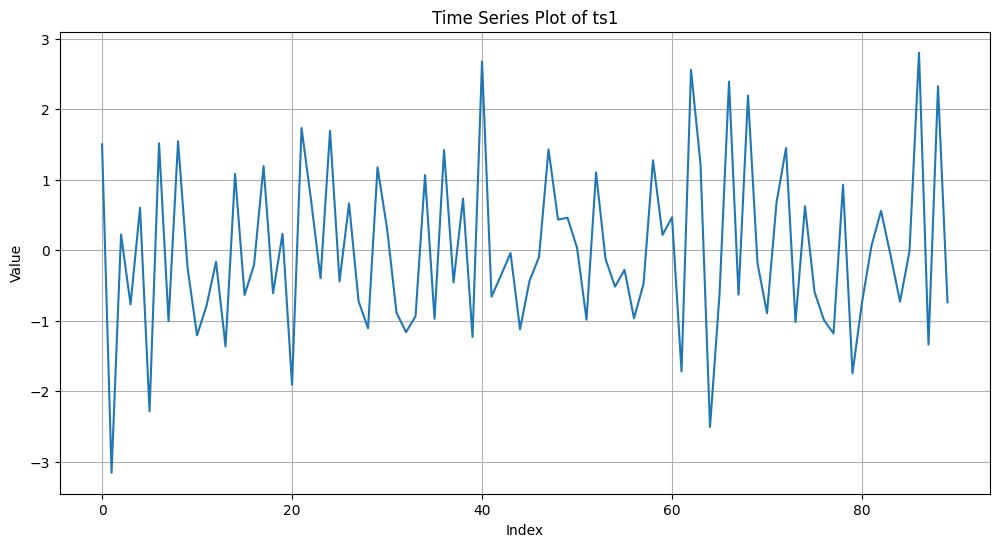

In [3]:
import matplotlib.pyplot as plt

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(ts1)
plt.title('Time Series Plot of ts1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

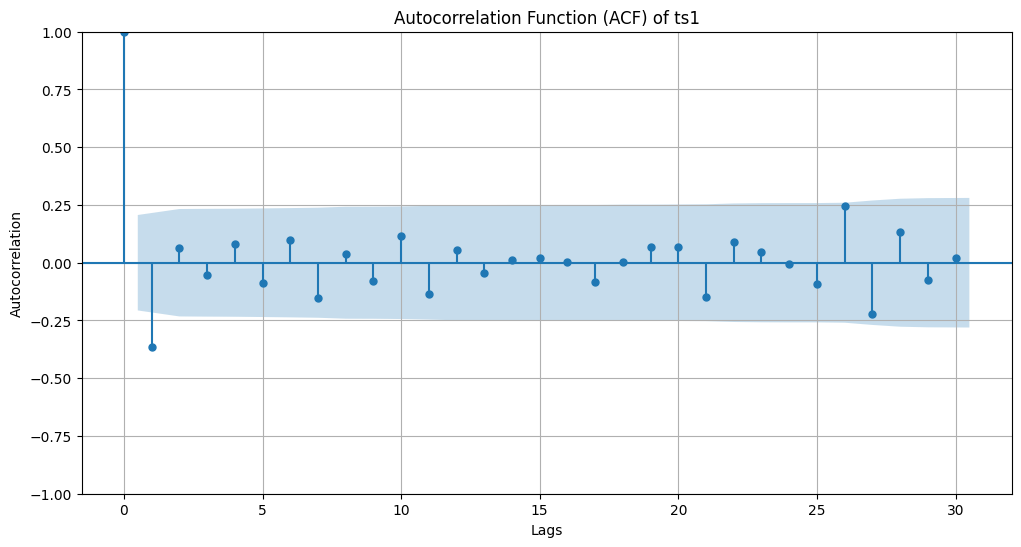

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(ts1, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of ts1')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

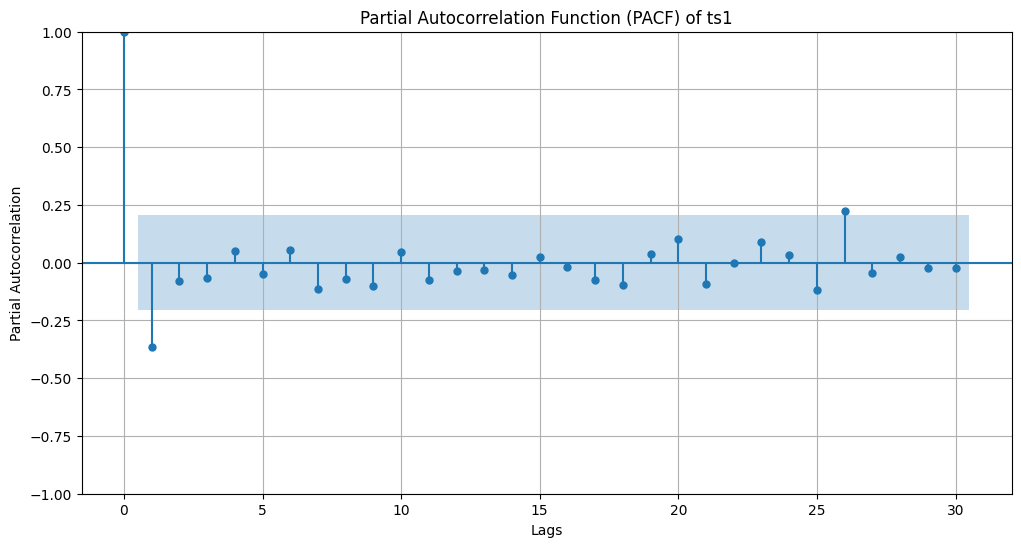

In [40]:
# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(ts1, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of ts1')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# 2. Selecting a couple of candidate ARIMA models based on our visual analysis.

In [83]:
from statsmodels.tsa.arima.model import ARIMA

model_ar1 = ARIMA(ts1, order=(1, 0, 0)).fit()

model_ma1 = ARIMA(ts1, order=(0, 0, 1)).fit()

model_arma11 = ARIMA(ts1, order=(3, 0, 2)).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 3. Fitting the candidate models to the data

In [68]:

print(model_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -137.516
Date:                Thu, 27 Nov 2025   AIC                            281.032
Time:                        14:41:35   BIC                            288.531
Sample:                             0   HQIC                           284.056
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.087     -0.166      0.868      -0.186       0.157
ar.L1         -0.3692      0.101     -3.638      0.000      -0.568      -0.170
sigma2         1.2416      0.215      5.783      0.0

In [43]:
display(comparison)

,Model,AIC,BIC
0,AR(1),281.031722,288.531151
1,MA(1),280.869307,288.368736
2,"ARMA(1,1)",282.547553,292.546791


In [34]:
print(comparison.to_markdown(index=False))

| Model     |     AIC |     BIC |
|:----------|--------:|--------:|
| AR(1)     | 281.032 | 288.531 |
| MA(1)     | 280.869 | 288.369 |
| ARMA(1,1) | 282.548 | 292.547 |


In [52]:
print(model_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -137.435
Date:                Thu, 27 Nov 2025   AIC                            280.869
Time:                        14:38:04   BIC                            288.369
Sample:                             0   HQIC                           283.894
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.076     -0.184      0.854      -0.163       0.135
ma.L1         -0.3768      0.113     -3.328      0.001      -0.599      -0.155
sigma2         1.2393      0.210      5.890      0.0

In [84]:
print(model_arma11.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -134.378
Date:                Thu, 27 Nov 2025   AIC                            282.757
Time:                        14:45:13   BIC                            300.255
Sample:                             0   HQIC                           289.813
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0147      0.090     -0.164      0.869      -0.190       0.161
ar.L1         -2.1778      0.133    -16.340      0.000      -2.439      -1.917
ar.L2         -1.5679      0.234     -6.694      0.0

In [46]:
comparison = pd.DataFrame({
    "Model": ["AR(1)", "MA(1)", "ARMA(1,1)"],
    "AIC": [model_ar1.aic, model_ma1.aic, model_arma11.aic],
    "BIC": [model_ar1.bic, model_ma1.bic, model_arma11.bic]
})

comparison


,Model,AIC,BIC
0,AR(1),281.031722,288.531151
1,MA(1),280.869307,288.368736
2,"ARMA(1,1)",282.547553,292.546791


# 4. Compute and plot the model forecast for five periods after the end of the series.

In [30]:
# 5-step ahead forecast from MA(1) model
ma1_forecast = model_ma1.get_forecast(steps=5)

ma1_mean = ma1_forecast.predicted_mean
ma1_conf = ma1_forecast.conf_int()

ma1_forecast_table = pd.DataFrame({
    "Forecast": ma1_mean,
    "Lower 95%": ma1_conf.iloc[:, 0],
    "Upper 95%": ma1_conf.iloc[:, 1]
})

ma1_forecast_table


,Forecast,Lower 95%,Upper 95%
90,-0.057148,-2.239022,2.124726
91,-0.013988,-2.345629,2.317653
92,-0.013988,-2.345629,2.317653
93,-0.013988,-2.345629,2.317653
94,-0.013988,-2.345629,2.317653


In [38]:
display(ma1_forecast_table)

,Forecast,Lower 95%,Upper 95%
90,-0.057148,-2.239022,2.124726
91,-0.013988,-2.345629,2.317653
92,-0.013988,-2.345629,2.317653
93,-0.013988,-2.345629,2.317653
94,-0.013988,-2.345629,2.317653


In [39]:
print(ma1_forecast_table.to_markdown(index=False))

|   Forecast |   Lower 95% |   Upper 95% |
|-----------:|------------:|------------:|
| -0.0571481 |    -2.23902 |     2.12473 |
| -0.0139881 |    -2.34563 |     2.31765 |
| -0.0139881 |    -2.34563 |     2.31765 |
| -0.0139881 |    -2.34563 |     2.31765 |
| -0.0139881 |    -2.34563 |     2.31765 |


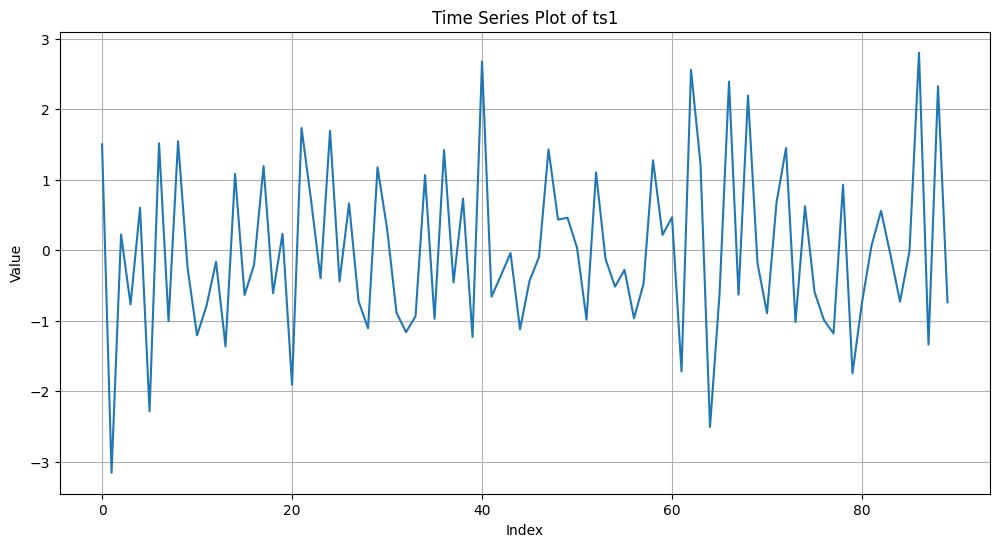

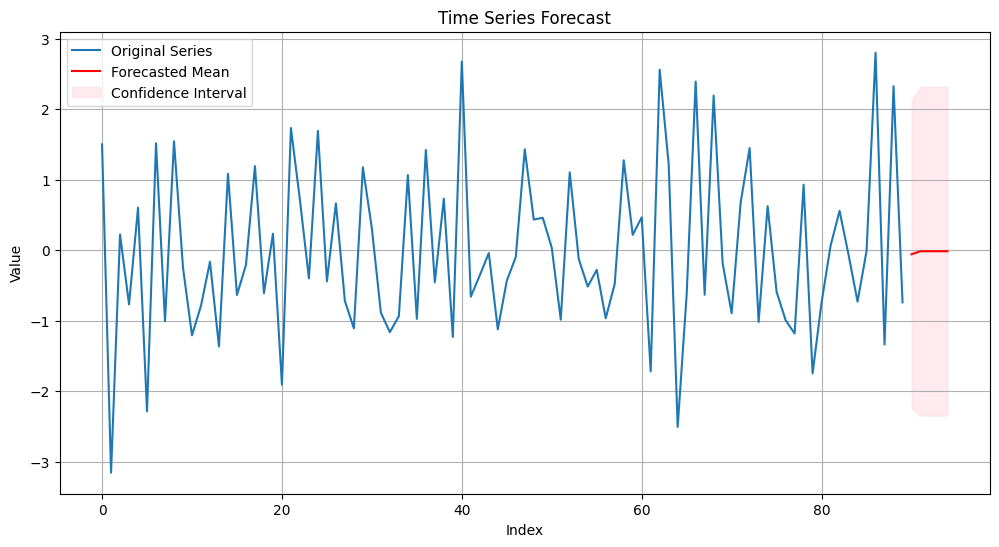

In [37]:
import matplotlib.pyplot as plt

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(ts1)
plt.title('Time Series Plot of ts1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ts1.index, ts1, label='Original Series')

# Extend the index for forecasting
last_index = ts1.index[-1]
forecast_steps = len(ma1_mean)
forecast_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 1 + forecast_steps)

plt.plot(forecast_index, ma1_mean, color='red', label='Forecasted Mean')
plt.fill_between(forecast_index, ma1_conf.iloc[:, 0], ma1_conf.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Time Series Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()